In [73]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer

from sklearn.metrics.classification import classification_report

max_words = 1000
batch_size = 32
epochs = 25

In [9]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

Loading data...
8982 train sequences
2246 test sequences


In [20]:
x_train[:2]

array([ list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12])], dtype=object)

In [25]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[100]])

In [26]:
decoded_newswire

'? opec ? world oil prices should be set around a fixed average price of 18 dlrs a barrel ? ? general secretary ? ? ? said today in a ? to a european community ec ? opec ? in ? ? here ? ? said opec ? the world energy trade should be ? without ? and should be ? around a fixed average price of 18 dlrs but he ? that ? of the 18 dlr a barrel level had caused ? for opec countries who had been ? to ? production and he ? that such ? by opec states could not be ? in some ? for opec to ? the world oil price at what is now ? the ? level of 18 dlrs a barrel its member countries have had to ? ? ? in ? production ? ? said such ? ? in certain ? be ? ? ? said as well as financial and marketing ? some states ? on ? gas output for domestic use and oil ? had ? ? gas supplies he added ? ? noted that total opec output was below the ? agreed ? for all member countries in february although this had ? ? the effect of these ? ? that market stability ? ? to a good level was still under pressure ? ? said a ? st

In [29]:
y_train[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [30]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

46 classes


## Vectorize data

In [31]:
print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Vectorizing sequence data...
x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


## Convert class vector to binary class matrix (for use with categorical_crossentropy)

In [33]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


### Build network model

In [74]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_18 (Dense)             (None, 46)                2990      
Total params: 548,334
Trainable params: 548,334
Non-trainable params: 0
_________________________________________________________________


In [75]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 8083 samples, validate on 899 samples
Epoch 1/25
8083/8083 [==============================] - 1s - loss: 1.3384 - acc: 0.6997 - val_loss: 1.0749 - val_acc: 0.7586
Epoch 2/25
8083/8083 [==============================] - 1s - loss: 0.6760 - acc: 0.8384 - val_loss: 0.9489 - val_acc: 0.7887
Epoch 3/25
8083/8083 [==============================] - 1s - loss: 0.4018 - acc: 0.9015 - val_loss: 0.9536 - val_acc: 0.7909
Epoch 4/25
8083/8083 [==============================] - 1s - loss: 0.2760 - acc: 0.9318 - val_loss: 0.9995 - val_acc: 0.7864
Epoch 5/25
8083/8083 [==============================] - 1s - loss: 0.2190 - acc: 0.9459 - val_loss: 1.0631 - val_acc: 0.7675
Epoch 6/25
8083/8083 [==============================] - 1s - loss: 0.1835 - acc: 0.9520 - val_loss: 1.0655 - val_acc: 0.7798
Epoch 7/25
8083/8083 [==============================] - 1s - loss: 0.1662 - acc: 0.9531 - val_loss: 1.1013 - val_acc: 0.7720
Epoch 8/25
8083/8083 [==============================] - 1s - loss: 0.1552 - ac

In [76]:
y_pred = model.predict_classes(x_test)

1216/2246 [===============>..............] - ETA: 0s

In [77]:
y_pred[11]

4

In [78]:
y_test[11]

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

# transform `y_test` into 1-dimension tensor with class value

In [79]:
np.argmax(y_test[11], axis=None, out=None)

4

In [80]:
y_classes = np.array([np.argmax(y, axis=None, out=None) for y in y_test])

In [81]:
y_classes.shape

(2246,)

In [82]:
y_pred.shape

(2246,)

In [83]:
print(classification_report(y_classes, y_pred))

             precision    recall  f1-score   support

          0       0.64      0.75      0.69        12
          1       0.64      0.81      0.72       105
          2       0.90      0.45      0.60        20
          3       0.92      0.92      0.92       813
          4       0.81      0.88      0.84       474
          5       0.25      0.20      0.22         5
          6       0.91      0.71      0.80        14
          7       1.00      0.33      0.50         3
          8       0.62      0.76      0.68        38
          9       0.73      0.76      0.75        25
         10       0.91      0.97      0.94        30
         11       0.76      0.69      0.72        83
         12       0.50      0.31      0.38        13
         13       0.51      0.62      0.56        37
         14       0.00      0.00      0.00         2
         15       0.40      0.22      0.29         9
         16       0.68      0.76      0.72        99
         17       0.75      0.50      0.60   

/Users/dsbatista/virtual_envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


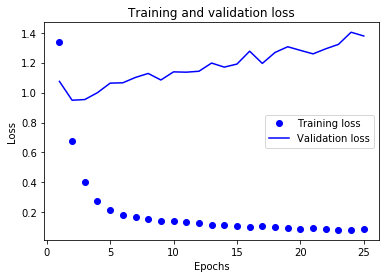

In [84]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

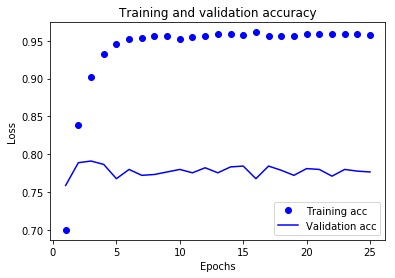

In [85]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()